In [ ]:
# Adiba Mohammed
# Assignment 11 - a
# Code written by Joseph Lee Wei En 
# URL: https://medium.com/intuitive-deep-learning/build-your-first
#      -neural-network-to-predict-house-prices-with-keras-eb5db60232c

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('housepricedata.csv')

In [5]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
dataset = df.values

In [7]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [8]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 19ms/step - loss: 0.6942 - accuracy: 0.4912 - val_loss: 0.6790 - val_accuracy: 0.5753
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.4922 - val_loss: 0.6751 - val_accuracy: 0.5753
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.4922 - val_loss: 0.6710 - val_accuracy: 0.5753
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.4941 - val_loss: 0.6668 - val_accuracy: 0.5753
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5068 - val_loss: 0.6628 - val_accuracy: 0.6164
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.5734 - val_loss: 0.6589 - val_accuracy: 0.6712
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6683 - val_loss: 0.6547 - val_accuracy: 0.7489
Epoch 8/100


In [20]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8813


0.8812785148620605

In [21]:
import matplotlib.pyplot as plt

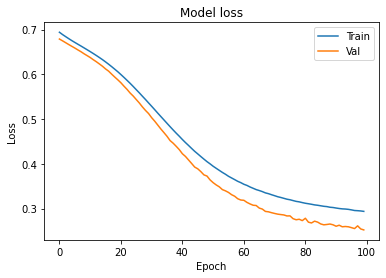

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


KeyError: 'acc'

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4846 - accuracy: 0.7691 - val_loss: 0.3238 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 45ms/step - loss: 0.3365 - accuracy: 0.8679 - val_loss: 0.3106 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 2s 64ms/step - loss: 0.3382 - accuracy: 0.8669 - val_loss: 0.2740 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 2s 61ms/step - loss: 0.3066 - accuracy: 0.8738 - val_loss: 0.3013 - val_accuracy: 0.8813
Epoch 5/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3032 - accuracy: 0.8708 - val_loss: 0.2423 - val_accuracy: 0.9178
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2695 - accuracy: 0.8953 - val_loss: 0.2405 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2456 - accuracy: 0.8924 - val_loss: 0.2041 - val_accuracy: 0.9087
Epoch 

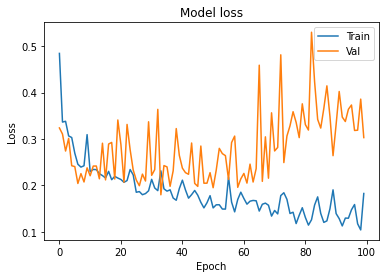

In [25]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [26]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [27]:
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [29]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 14s 74ms/step - loss: 14.2415 - accuracy: 0.6243 - val_loss: 3.8809 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 2s 77ms/step - loss: 1.6922 - accuracy: 0.8033 - val_loss: 0.6449 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 2s 62ms/step - loss: 0.5947 - accuracy: 0.8307 - val_loss: 0.4736 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 2s 63ms/step - loss: 0.5434 - accuracy: 0.8425 - val_loss: 0.4552 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 3s 81ms/step - loss: 0.4949 - accuracy: 0.8650 - val_loss: 0.4535 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 2s 73ms/step - loss: 0.5121 - accuracy: 0.8493 - val_loss: 0.4284 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 2s 68ms/step - loss: 0.4780 - accuracy: 0.8767 - val_loss: 0.4567 - val_accuracy: 0.9132
Epoc

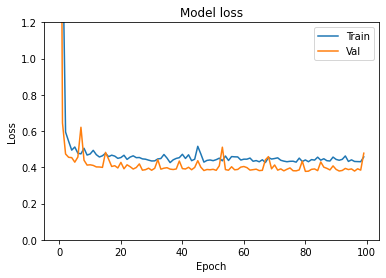

In [30]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [31]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'